# **>> METADATA**

This is a PROMISE data set made publicly available in order to encourage repeatable, verifiable, refutable, and/or improvable predictive models of software engineering.

If you publish material based on PROMISE data sets then, please follow the acknowledgment guidelines posted on the PROMISE repository.

 web page http://promise.site.uottawa.ca/SERepository .


  ### **Attribute Information:**
 	
      1. loc             : numeric % McCabe's line count of code
      2. v(g)            : numeric % McCabe "cyclomatic complexity"
      3. ev(g)           : numeric % McCabe "essential complexity"
      4. iv(g)           : numeric % McCabe "design complexity"
      5. n               : numeric % Halstead total operators + operands
      6. v               : numeric % Halstead "volume"
      7. l               : numeric % Halstead "program length"
      8. d               : numeric % Halstead "difficulty"
      9. i               : numeric % Halstead "intelligence"
     10. e               : numeric % Halstead "effort"
     11. b               : numeric % Halstead 
     12. t               : numeric % Halstead's time estimator
     13. lOCode          : numeric % Halstead's line count
     14. lOComment       : numeric % Halstead's count of lines of comments
     15. lOBlank         : numeric % Halstead's count of blank lines
     16. lOCodeAndComment: numeric
     17. uniq_Op         : numeric % unique operators
     18. uniq_Opnd       : numeric % unique operands
     19. total_Op        : numeric % total operators
     20. total_Opnd      : numeric % total operands
     21: branchCount     : numeric % of the flow graph
     22. defects         : {false,true} % module has/has not one or more reported defects
 
 >> **Missing attributes:** None

 >> **Class Distribution:** the class value (defects) is discrete 
    false: 2106 = 19.35%
    true:  8779 = 80.65%




<img align = "center" src="https://vit.ac.in/ICBRAMR/ICBRAMR_website/vit.png" alt="Girl in a jacket" width="500" height="600">

<h1 align = "center" style = "color: #608bef">Software Defect Prediction System</h1>

<p></p>
<p></p>
<h2 align = "center" style = "color: #a82222">SYED AYAZ IMAM (18BCE0660)</h2>
<h2 align = "center" style = "color: #a82222">AISHIKA SAHA (18BCE2168)</h2>

# **>> IMPORTING THE DATASET FROM GOOGLE DRIVE**

In [ ]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1zJSUeg63pbdwnDgw2TJ7ZRPDIhoJAeNK' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1zJSUeg63pbdwnDgw2TJ7ZRPDIhoJAeNK" -O data.csv && rm -rf /tmp/cookies.txt

--2021-05-20 12:56:05--  https://docs.google.com/uc?export=download&confirm=&id=1zJSUeg63pbdwnDgw2TJ7ZRPDIhoJAeNK
Resolving docs.google.com (docs.google.com)... 108.177.126.100, 108.177.126.138, 108.177.126.139, ...
Connecting to docs.google.com (docs.google.com)|108.177.126.100|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0k-8s-docs.googleusercontent.com/docs/securesc/4umttp1k455btc53aap8ojpdp83t13as/cggehg3b5pnhadim6c5u4u69mfitbjo1/1621515300000/14211000813324722452/07949542554768992849Z/1zJSUeg63pbdwnDgw2TJ7ZRPDIhoJAeNK?e=download [following]
--2021-05-20 12:56:06--  https://doc-0k-8s-docs.googleusercontent.com/docs/securesc/4umttp1k455btc53aap8ojpdp83t13as/cggehg3b5pnhadim6c5u4u69mfitbjo1/1621515300000/14211000813324722452/07949542554768992849Z/1zJSUeg63pbdwnDgw2TJ7ZRPDIhoJAeNK?e=download
Resolving doc-0k-8s-docs.googleusercontent.com (doc-0k-8s-docs.googleusercontent.com)... 173.194.79.132, 2a00:1450:4013:c05::84
Connecting

# **>> IMPORTING LIBRARIES**

In [ ]:
import numpy as np # linear algebra
import pandas as pd # SV file I/O
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
from sklearn import model_selection
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import tensorflow as tf

In [ ]:
data = pd.read_csv('data.csv')

In [ ]:
data.head()

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,b,t,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
0,1.1,1.4,1.4,1.4,1.3,1.30,1.30,1.30,1.30,1.30,1.30,1.30,2,2,2,2,1.2,1.2,1.2,1.2,1.4,False
1,1.0,1.0,1.0,1.0,1.0,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1,1,1,1,1,1,1,1,1,True
2,72.0,7.0,1.0,6.0,198.0,1134.13,0.05,20.31,55.85,23029.10,0.38,1279.39,51,10,8,1,17,36,112,86,13,True
3,190.0,3.0,1.0,3.0,600.0,4348.76,0.06,17.06,254.87,74202.67,1.45,4122.37,129,29,28,2,17,135,329,271,5,True
4,37.0,4.0,1.0,4.0,126.0,599.12,0.06,17.19,34.86,10297.30,0.20,572.07,28,1,6,0,11,16,76,50,7,True


In [ ]:
defect_true_false = data.groupby('defects')['b'].apply(lambda x: x.count())
print('False: ',defect_true_false[0])
print('True: ',defect_true_false[1])

False:  8779
True:  2106


In [ ]:
data = data.dropna()
data.isnull().sum()

loc                  0
v(g)                 0
ev(g)                0
iv(g)                0
n                    0
v                    0
l                    0
d                    0
i                    0
e                    0
b                    0
t                    0
lOCode               0
lOComment            0
lOBlank              0
locCodeAndComment    0
uniq_Op              0
uniq_Opnd            0
total_Op             0
total_Opnd           0
branchCount          0
defects              0
dtype: int64

# **>> DATA ANALYSIS**

In [ ]:
print("The shape of the data is: ", data.shape)

The shape of the data is:  (10885, 22)


In [ ]:
#Simple Statistics
data.describe()

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,b,t,lOCode,lOComment,lOBlank,locCodeAndComment
count,10885.000000,10885.000000,10885.000000,10885.000000,10885.000000,10885.000000,10885.000000,10885.000000,10885.000000,1.088500e+04,10885.000000,1.088500e+04,10885.000000,10885.000000,10885.00000,10885.000000
mean,42.016178,6.348590,3.401047,4.001599,114.389738,673.758017,0.135335,14.177237,29.439544,3.683637e+04,0.224766,2.046465e+03,26.252274,2.737529,4.62554,0.370785
std,76.593332,13.019695,6.771869,9.116889,249.502091,1938.856196,0.160538,18.709900,34.418313,4.343678e+05,0.646408,2.413154e+04,59.611201,9.008608,9.96813,1.907969
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.00000,0.000000
25%,11.000000,2.000000,1.000000,1.000000,14.000000,48.430000,0.030000,3.000000,11.860000,1.619400e+02,0.020000,9.000000e+00,4.000000,0.000000,0.00000,0.000000
50%,23.000000,3.000000,1.000000,2.000000,49.000000,217.130000,0.080000,9.090000,21.930000,2.031020e+03,0.070000,1.128300e+02,13.000000,0.000000,2.00000,0.000000
75%,46.000000,7.000000,3.000000,4.000000,119.000000,621.480000,0.160000,18.900000,36.780000,1.141643e+04,0.210000,6.342500e+02,28.000000,2.000000,5.00000,0.000000
max,3442.000000,470.000000,165.000000,402.000000,8441.000000,80843.080000,1.300000,418.200000,569.780000,3.107978e+07,26.950000,1.726655e+06,2824.000000,344.000000,447.00000,108.000000


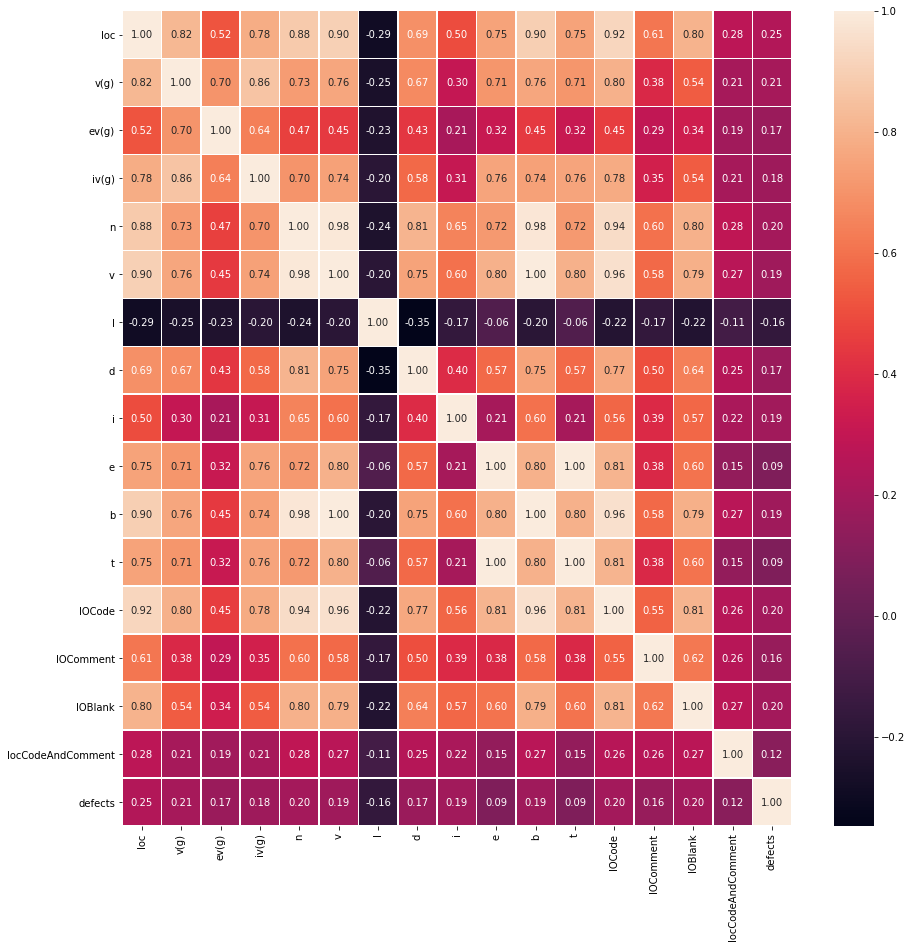

In [ ]:
f,ax = plt.subplots(figsize = (15, 15))
sns.heatmap(data.corr(), annot = True, linewidths = .5, fmt = '.2f')
plt.show()

## **>> DATA PREPROCESSING**

<img align = "center" src = "https://media.geeksforgeeks.org/wp-content/uploads/min-max-normalisation.jpg"></img>

In [ ]:
from sklearn import preprocessing

scale_v = data[['v']]
scale_b = data[['b']]

minmax_scaler = preprocessing.MinMaxScaler()

v_scaled = minmax_scaler.fit_transform(scale_v)
b_scaled = minmax_scaler.fit_transform(scale_b)

data['v_ScaledUp'] = pd.DataFrame(v_scaled)
data['b_ScaledUp'] = pd.DataFrame(b_scaled)

data

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,b,t,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects,v_ScaledUp,b_ScaledUp
0,1.1,1.4,1.4,1.4,1.3,1.30,1.30,1.30,1.30,1.30,1.30,1.30,2,2,2,2,1.2,1.2,1.2,1.2,1.4,False,0.000016,0.048237
1,1.0,1.0,1.0,1.0,1.0,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1,1,1,1,1,1,1,1,1,True,0.000012,0.037106
2,72.0,7.0,1.0,6.0,198.0,1134.13,0.05,20.31,55.85,23029.10,0.38,1279.39,51,10,8,1,17,36,112,86,13,True,0.014029,0.014100
3,190.0,3.0,1.0,3.0,600.0,4348.76,0.06,17.06,254.87,74202.67,1.45,4122.37,129,29,28,2,17,135,329,271,5,True,0.053793,0.053803
4,37.0,4.0,1.0,4.0,126.0,599.12,0.06,17.19,34.86,10297.30,0.20,572.07,28,1,6,0,11,16,76,50,7,True,0.007411,0.007421
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10880,18.0,4.0,1.0,4.0,52.0,241.48,0.14,7.33,32.93,1770.86,0.08,98.38,13,0,2,0,10,15,30,22,7,False,0.002987,0.002968
10881,9.0,2.0,1.0,2.0,30.0,129.66,0.12,8.25,15.72,1069.68,0.04,59.43,5,0,2,0,12,8,19,11,3,False,0.001604,0.001484
10882,42.0,4.0,1.0,2.0,103.0,519.57,0.04,26.40,19.68,13716.72,0.17,762.04,29,1,10,0,18,15,59,44,7,False,0.006427,0.006308
10883,10.0,1.0,1.0,1.0,36.0,147.15,0.12,8.44,17.44,1241.57,0.05,68.98,6,0,2,0,9,8,21,15,1,False,0.001820,0.001855


In [ ]:
data.dtypes

loc                  float64
v(g)                 float64
ev(g)                float64
iv(g)                float64
n                    float64
v                    float64
l                    float64
d                    float64
i                    float64
e                    float64
b                    float64
t                    float64
lOCode                 int64
lOComment              int64
lOBlank                int64
locCodeAndComment      int64
uniq_Op               object
uniq_Opnd             object
total_Op              object
total_Opnd            object
branchCount           object
defects                 bool
v_ScaledUp           float64
b_ScaledUp           float64
dtype: object

In [ ]:
data['branchCount'] = pd.to_numeric(data['branchCount'],errors = 'coerce')
data['total_Opnd'] = pd.to_numeric(data['total_Opnd'],errors = 'coerce')
data['total_Op'] = pd.to_numeric(data['total_Op'],errors = 'coerce')
data['uniq_Opnd'] = pd.to_numeric(data['uniq_Opnd'],errors = 'coerce')
data['uniq_Op'] = pd.to_numeric(data['uniq_Op'],errors = 'coerce')

In [ ]:
data.shape

(10885, 24)

In [ ]:
def values(x):
    if x == True:
        return 1
    return 0

data['defects'] = data['defects'].map(values)

X = data.iloc[:,0:21]
Y = data.iloc[:,21]

Y = Y.map(values)

In [ ]:
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=0.2, random_state=3)

print("X train Shape: ", X_train.shape)
print("X test Shape: ", X_test.shape)
print("Y train Shape: ", Y_train.shape)
print("Y test Shape: ", Y_test.shape)

X train Shape:  (8708, 21)
X test Shape:  (2177, 21)
Y train Shape:  (8708,)
Y test Shape:  (2177,)


<img align = "center" src = "https://i.stack.imgur.com/SPq4w.png"></img>

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

<img align = "center" src = "https://i.ibb.co/9sCQkXq/Screenshot-2021-05-19-at-10-45-42-PM.png"></img>

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units = 512, input_dim=21, activation = 'relu'))
model.add(tf.keras.layers.Dense(units = 512, input_dim=21, activation = 'relu'))
model.add(tf.keras.layers.Dense(units = 256, input_dim=21, activation = 'relu'))
model.add(tf.keras.layers.Dense(units = 256, activation = 'relu'))
model.add(tf.keras.layers.Dense(units = 128, activation = 'relu'))
model.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))


opt = Adam(lr=1e-5)

model.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               11264     
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_4 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 129       
Total params: 504,065
Trainable params: 504,065
Non-trainable params: 0
__________________________________________________

In [ ]:
model.fit(X_train, Y_train, batch_size = 128, epochs =100)

Epoch 1/100
69/69 [==============================] - 2s 10ms/step - loss: nan - accuracy: 0.7711
Epoch 2/100
69/69 [==============================] - 1s 10ms/step - loss: nan - accuracy: 0.8035
Epoch 3/100
69/69 [==============================] - 1s 11ms/step - loss: nan - accuracy: 0.8075
Epoch 4/100
69/69 [==============================] - 1s 10ms/step - loss: nan - accuracy: 0.8046
Epoch 5/100
69/69 [==============================] - 1s 10ms/step - loss: nan - accuracy: 0.8067
Epoch 6/100
69/69 [==============================] - 1s 10ms/step - loss: nan - accuracy: 0.8145
Epoch 7/100
69/69 [==============================] - 1s 10ms/step - loss: nan - accuracy: 0.8073
Epoch 8/100
69/69 [==============================] - 1s 10ms/step - loss: nan - accuracy: 0.8041
Epoch 9/100
69/69 [==============================] - 1s 10ms/step - loss: nan - accuracy: 0.8066
Epoch 10/100
69/69 [==============================] - 1s 10ms/step - loss: nan - accuracy: 0.8030
Epoch 11/100
69/69 [=========